In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
w = 1.0 # a random guess

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


loss(3, 5)

4.0

In [21]:
x = [1.0, 2.0, 3.0]
y = [2.0, 4.0, 6.0]

w_list = []
mse_list = []

for w in np.arange(0, 4.1, 0.1):
    #print(w)
    total_loss = 0
    
    for x_val, y_val in zip(x, y):
#         print(x_val, y_val)
        y_pred = forward(x_val)
        l = loss(x_val, y_val)
        total_loss += l
        
    w_list.append(w)
    mse_list.append(total_loss / len(x))

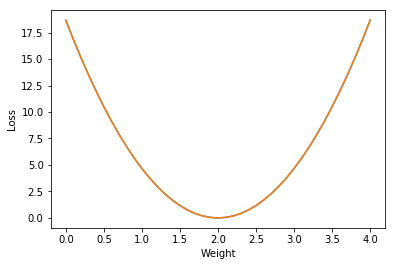

In [25]:
plt.plot(w_list, mse_list)
plt.ylabel("Loss")
plt.xlabel("Weight")
plt.show()

$$d_loss/dw = 2x(xw - y) $$

In [29]:
 def gradient(x, y):
    return 2 * x * (x * w - y)

In [28]:
gradient(1.0, 2.0)

4.0

In [52]:
x = [1.0, 2.0, 3.0]
y = [2.0, 4.0, 6.0]

w = 1.0
learning_rate = 0.01

print("predict (before training)", 4, forward(4))

for epoch in range(100):
    for x_val, y_val in zip(x, y):
        y_pred = forward(x_val)
        grad = gradient(x_val, y_val)
        w = w - (learning_rate * grad)
        l = loss(x_val, y_val)
        
    if epoch % 10 == 0:
        print("epoch : ", epoch, w, l)

print("predict (after training)", 4, forward(4))

predict (before training) 4 4.0
epoch :  0 1.260688 4.919240100095999
epoch :  10 1.9639333911678687 0.01170720245384975
epoch :  20 1.998240525958391 2.7861740127856012e-05
epoch :  30 1.9999141657892625 6.630760559646474e-08
epoch :  40 1.9999958126624442 1.5780416225633037e-10
epoch :  50 1.9999997957248556 3.7555501141274804e-13
epoch :  60 1.999999990034638 8.937759877335403e-16
epoch :  70 1.9999999995138495 2.1270797208746147e-18
epoch :  80 1.9999999999762834 5.062350511130293e-21
epoch :  90 1.9999999999988431 1.2047849775995315e-23
predict (after training) 4 7.9999999999996945


In [51]:
forward(4)

7.9999999999996945

In [54]:
import torch
from torch.autograd import Variable

In [55]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [56]:
w = Variable(torch.Tensor([1.0]), requires_grad=True)

<function __main__.loss>

In [59]:
w = 1.0 # a random guess

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


loss(3, 5)

4.0

In [61]:
x_data

[1.0, 2.0, 3.0]

In [60]:
# Before training
print("predict (before training)",  4, forward(4).data[0])

# Training loop
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        l.backward()
        print("\tgrad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()

    print("progress:", epoch, l.data[0])

# After training
print("predict (after training)",  4, forward(4).data[0])

AttributeError: 'float' object has no attribute 'data'

In [73]:
import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value

# our model forward pass

def forward(x):
    return x * w

# Loss function


def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

# Before training
print("predict (before training)",  4, forward(4).data[0])

# Training loop
for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        l.backward()
#         print("\tgrad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
    if epoch % 10 == 0:
        print("progress:", epoch, l.data[0])

# After training
print("predict (after training)",  4, forward(4).data[0])

predict (before training) 4 tensor(4.)
progress: 0 tensor(7.3159)
progress: 10 tensor(0.0174)
progress: 20 tensor(4.1433e-05)
progress: 30 tensor(9.8744e-08)
progress: 40 tensor(2.3283e-10)
progress: 50 tensor(9.0949e-13)
progress: 60 tensor(9.0949e-13)
progress: 70 tensor(9.0949e-13)
progress: 80 tensor(9.0949e-13)
progress: 90 tensor(9.0949e-13)
predict (after training) 4 tensor(8.0000)


## Let's do a linear regression using Pytorch all the way

In [220]:
x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

In [221]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

In [222]:
# initialize the model
model = Model()

In [223]:
# create optimizer and loss functions
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = torch.nn.modules.loss.MSELoss()

In [224]:
for epoch in range(500):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [225]:
new_x = Variable(torch.Tensor([4.0]))
new_y = model(new_x)
new_y.item()

7.9184465408325195

## Let's do Logistics Regression Now

In [259]:
x_data = Variable(torch.Tensor([[1.0],[2.0],[3.0],[4.0]]))
y_data = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]))

In [260]:
x_data.shape, y_data.shape

(torch.Size([4, 1]), torch.Size([4, 1]))

In [268]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))
        
        
model = Model()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = torch.nn.modules.loss.BCELoss(reduction='mean')


In [269]:
y_pred, y_data

(None, tensor([[0.],
         [0.],
         [1.],
         [1.]]))

In [271]:
model(x_data)

tensor([[0.7593],
        [0.8782],
        [0.9428],
        [0.9742]], grad_fn=<SigmoidBackward>)

In [296]:
for epoch in range(500):
    # makde a prediction / forward pass
    y_pred = model(x_data)

    # capture loss and optimize

    optimizer.zero_grad()
    loss = criterion(y_pred, y_data)

    # calculate gradient descent and propagate backwards
    loss.backward()

    # update weights
    optimizer.step()
    
    # print statistics
    if epoch % 50 == 0:
        print("epoch", epoch, "loss", loss.item())

epoch 0 loss 0.4487362504005432
epoch 50 loss 0.44215553998947144
epoch 100 loss 0.43578028678894043
epoch 150 loss 0.4296022951602936
epoch 200 loss 0.4236137568950653
epoch 250 loss 0.41780686378479004
epoch 300 loss 0.41217461228370667
epoch 350 loss 0.4067099690437317
epoch 400 loss 0.4014062285423279
epoch 450 loss 0.3962570130825043


In [298]:
# make a new prediction

new_x = Variable(torch.Tensor([1.0]))
new_y = model(new_x)

print(new_y.data.item(), new_y > 0.5)

new_x = Variable(torch.Tensor([10.0]))
new_y = model(new_x)

print(new_y.data.item(), new_y > 0.5)

0.3011246621608734 tensor([0], dtype=torch.uint8)
0.9990750551223755 tensor([1], dtype=torch.uint8)


## Let's do Diabetes Classification
# get the diabetes.csv data

In [300]:
pwd

'D:\\spider_work'

In [303]:
ls data

 Volume in drive D is Local Disk
 Volume Serial Number is 927D-F5DC

 Directory of D:\spider_work\data

03/15/2019  11:01 AM    <DIR>          .
03/15/2019  11:01 AM    <DIR>          ..
03/14/2019  04:28 PM            13,539 diabetes.csv.gz
               1 File(s)         13,539 bytes
               2 Dir(s)  774,522,019,840 bytes free


In [32]:
xy = np.loadtxt('data/diabetes.csv', delimiter=',',dtype=np.float32)

In [389]:
int(759 * .8)

607

In [314]:
x_data = Variable(torch.from_numpy(xy[:,0:-1]))

In [316]:
y_data = Variable(torch.from_numpy(xy[:,[-1]]))

In [318]:
x_data.shape, y_data.shape

(torch.Size([759, 8]), torch.Size([759, 1]))

In [33]:
x_train = Variable(torch.from_numpy(xy[:int(759 * .8),0:-1]))
y_train = Variable(torch.from_numpy(xy[:int(759 * .8),[-1]]))

In [466]:
x_train.shape, y_train.shape

(torch.Size([607, 8]), torch.Size([607, 1]))

In [6]:
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [34]:
x_val = Variable(torch.from_numpy(xy[x_train.shape[0]:-1,0:-1]))
y_val = Variable(torch.from_numpy(xy[y_train.shape[0]:-1,[-1]]))

In [39]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        
        self.sigmoid = torch.sigmoid
        
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        y_pred = self.sigmoid(self.linear3(x))
        return y_pred
    
model = Model()



In [40]:
for epoch in range(500):
    y_pred = model(x_train)

    # let's build the optimizer and loss function

    #optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
    optimizer = torch.optim.Adagrad(model.parameters(), lr=0.1)
    criterion = torch.nn.modules.loss.BCELoss(reduction='mean')



    # let's calculate the loss
    
    loss = criterion(y_pred, y_train)
    
        # let's initialize the gradient
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    # print loss
    if epoch % 50 == 0:
        print(loss.data.item())

0.6498209238052368
0.5444836020469666
0.5444834232330322
0.5444833040237427
0.5444833636283875
0.5444831252098083
0.5444830060005188
0.544482946395874
0.544482946395874
0.5444828271865845


In [48]:
num_correct = 0
new_y = model(x_val)
for i in range(new_y.shape[0]):
    if (new_y[i] > 0.5).item() == y_train[i].item():
        num_correct += 1
        #print ((new_y[i] > 0.5).item(), y_train[i].item())
        
print("accuracy: ", num_correct/ new_y.shape[0])

accuracy:  0.46357615894039733


## Let's do a DatasetLoader

In [7]:
class DiabetesDataset(Dataset):
    def __init__(self):
        super(DiabetesDataset, self)
        xy = np.loadtxt('data/diabetes.csv', delimiter=',',dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = Variable(torch.Tensor(xy[:, 0 : -1]))
        self.y_data = Variable(torch.Tensor(xy[:, [-1]]))
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len

In [8]:
dataset = DiabetesDataset()
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)


In [41]:
# optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.1)
criterion = torch.nn.modules.loss.BCELoss(reduction='mean')

In [46]:
for epoch in range(50):
#     print(epoch)
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        #forward pass
        y_pred = model(inputs)
        #print(y_pred)
        loss = criterion(y_pred, labels)
        #print loss
#         print(epoch)
        if epoch % 10 and i % 20 == 0:
            print(i, loss.item())        
        
        # initialize gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        


0 0.4729618728160858
20 0.4221133589744568
0 0.49943670630455017
20 0.525838315486908
0 0.3916226625442505
20 0.47642916440963745
0 0.31007587909698486
20 0.4784518778324127
0 0.48001280426979065
20 0.5567070841789246
0 0.5043805837631226
20 0.36243605613708496
0 0.4349493384361267
20 0.5819852948188782
0 0.35351690649986267
20 0.5065621137619019
0 0.39435866475105286
20 0.510428786277771
0 0.641165018081665
20 0.5962497591972351
0 0.5090996623039246
20 0.6387606859207153
0 0.453039288520813
20 0.3863893449306488
0 0.5939332246780396
20 0.4192889630794525
0 0.5293391346931458
20 0.536784291267395
0 0.3898825943470001
20 0.398797869682312
0 0.4395953118801117
20 0.5422508716583252
0 0.40471842885017395
20 0.42681965231895447
0 0.4740414321422577
20 0.561590850353241
0 0.5227285623550415
20 0.5449935793876648
0 0.530718982219696
20 0.5605756640434265
0 0.5233448147773743
20 0.5638911724090576
0 0.3846267759799957
20 0.5026983618736267
0 0.5096893310546875
20 0.4414781928062439
0 0.329995

In [66]:
model(Variable(torch.Tensor(xy[:10, 0 : -1 ]))) > 0.5

tensor([[0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=torch.uint8)

In [65]:
xy[:10, [-1]]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)